# Exploring Dandiset 001366: Surface Vessel Diameter and Pulsatility Quantification

This notebook was generated by an AI and has not been fully verified. Please be cautious when interpreting the code or results.

## Dandiset Overview
This Dandiset contains movies of a pial vessel of mice used in experiments comparing approaches for surface vessel diameter and pulsatility quantification.

**Dandiset ID:** 001366
**Version:** 0.250324.1603
**Dandiset URL:** https://dandiarchive.org/dandiset/001366/0.250324.1603

## Notebook Contents
This notebook will demonstrate how to:
- Load the Dandiset and list its assets using the DANDI API.
- Load a specific NWB file from the Dandiset.
- Explore the structure and metadata of the NWB file.
- Load and visualize a subset of the image data.

## Required Packages
The following packages are required to run this notebook:
- pynwb
- h5py
- remfile
- dandi
- matplotlib
- numpy

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set_theme()

## Loading the Dandiset
We can connect to the DANDI archive and retrieve information about the Dandiset using the `dandi` library.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## Loading an NWB file
This Dandiset contains NWB files with imaging data. We will load one of these files to explore its contents.

We are loading the file at path `sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`.

The URL for this asset is constructed from its ID: `https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/`

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")

Session description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Identifier: Qinwen_6th_March_03122024-m4-baseline
Session start time: 2024-03-12 01:00:00-04:00
Subject ID: 031224_M4
Subject sex: M
Subject species: Mus musculus


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Contents
The NWB file contains an `acquisition` section with an `ImageSeries` called `Movies`. This `ImageSeries` contains the raw movie data.

```
NWBFile
├── acquisition
│   └── Movies (ImageSeries)
│       ├── data (Dataset) shape (6000, 512, 512); dtype uint16
│       ├── starting_time
│       ├── rate
│       ├── resolution
│       ├── comments
│       ├── description
│       ├── conversion
│       ├── offset
│       ├── unit
│       └── starting_time_unit
├── keywords (StrDataset) shape (1,)
├── experiment_description
├── session_id
├── institution
├── subject (Subject)
│   ├── age
│   ├── age__reference
│   ├── description
│   ├── sex
│   ├── species
│   └── subject_id
├── session_description
├── identifier
├── session_start_time
├── timestamps_reference_time
└── file_create_date
```

You can explore this NWB file further on Neurosift: [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=draft)

## Visualizing Image Data
The main data in this NWB file is the movie data stored in `acquisition['Movies']['data']`. This is a large dataset (6000 frames of 512x512 pixels). We will load and visualize a few frames to demonstrate how to access the data.

Movie data shape: (6000, 512, 512)


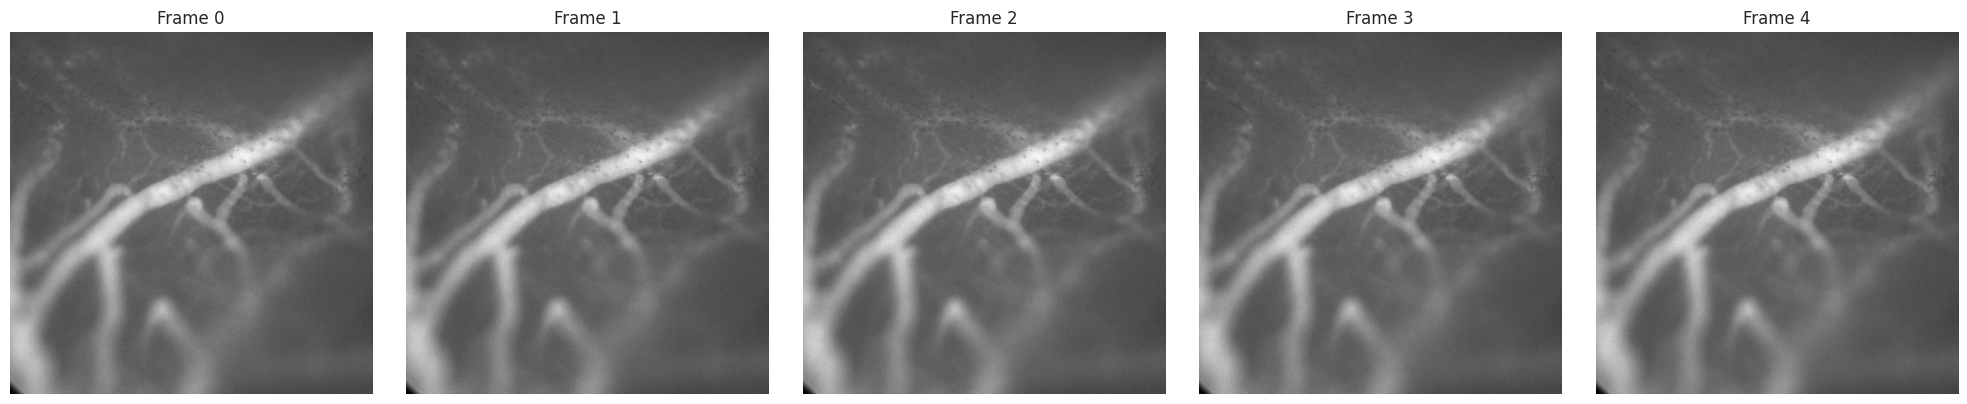

In [4]:
# Access the movie data dataset
movie_data = nwb.acquisition['Movies'].data

# Get the shape of the data
data_shape = movie_data.shape
print(f"Movie data shape: {data_shape}")

# Load the first 5 frames (to avoid loading too much data)
num_frames_to_load = 5
if data_shape[0] < num_frames_to_load:
    num_frames_to_load = data_shape[0]

frames = movie_data[0:num_frames_to_load, :, :]

# Visualize the frames
fig, axes = plt.subplots(1, num_frames_to_load, figsize=(num_frames_to_load * 4, 4))
if num_frames_to_load == 1:
    axes = [axes] # Ensure axes is iterable even for a single frame
for i in range(num_frames_to_load):
    axes[i].imshow(frames[i, :, :], cmap='gray')
    axes[i].set_title(f"Frame {i}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## Summary and Future Directions
This notebook demonstrated how to load a Dandiset and an NWB file containing imaging data. We explored the basic metadata and visualized a small subset of the movie data.

Future analysis could involve:
- Loading and processing larger sections of the movie data for more in-depth analysis.
- Applying image analysis techniques to quantify vessel diameter and pulsatility, as suggested by the Dandiset title and keywords.
- Investigating potential correlations between imaging data and any other physiological measurements if they were available in other parts of the NWB file or Dandiset.
- Utilizing specific tools or libraries designed for analyzing this type of neurophysiological imaging data.